### **Import libraries**

In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **Preprocess results**

In [ ]:
with open(file="../.deepeval/.deepeval-cache.json", mode="r", encoding="utf-8") as file:
  eval_results = json.load(file)

with open(file="../data/qa/qa_dataset.json", mode="r", encoding="utf-8") as file:
  qa_dataset = json.load(file)

dict_data_list = []
for key, val in eval_results["test_cases_lookup_map"].items():
  dict_data = dict()

  key_dict = json.loads(key)
  dict_data["user_input"] = key_dict["input"]

  metric_name_mapping = {
    0: "contextual_precision",
    1: "contextual_recall",
    2: "faithfulness",
    3: "answer_relevancy"
  }
  for i, data in enumerate(val["cached_metrics_data"]):
    dict_data[f"{metric_name_mapping[i]}_score"] = data["metric_data"]["score"]
    dict_data[f"{metric_name_mapping[i]}_reason"] = data["metric_data"]["reason"]
  
  dict_data_list.append(dict_data)

eval_result_df = pd.DataFrame(data=dict_data_list)
qa_dataset_df = pd.DataFrame(data=qa_dataset)
df = qa_dataset_df.merge(right=eval_result_df, how="inner", left_on="question", right_on="user_input")
df = df.drop(columns="user_input")
df.to_csv("../data/results/result.csv", index=False)
df.head(n=3)

,question,answer,question_type,contextual_precision_score,contextual_precision_reason,contextual_recall_score,contextual_recall_reason,faithfulness_score,faithfulness_reason,answer_relevancy_score,answer_relevancy_reason
0,Việc truy xuất kiến thức liên quan đến truy vấ...,Việc truy xuất kiến thức liên quan đến truy vấ...,inferential,1.0000,The score is 1.00 because all the relevant nod...,1.0,The score is 1.00 because the 1st node in retr...,1.0,The score is 1.00 because the actual output al...,1.0,The score is 1.00 because there are no irrelev...
1,Điều gì xảy ra khi ChatGPT được cung cấp thông...,Khi ChatGPT được cung cấp thông tin chính thức...,analytical,0.8875,The score is 0.89 because the third node in th...,1.0,The score is 1.00 because the node(s) in retri...,1.0,The score is 1.00 because the actual output al...,1.0,The score is 1.00 because there are no irrelev...
2,Tại sao hiện tượng ảo giác (hallucination) tro...,Hiện tượng ảo giác trong các LLM đáng lo ngại ...,factual,1.0000,The score is 1.00 because all the relevant nod...,1.0,The score is 1.00 because the first sentence i...,1.0,The faithfulness score is 1.00 because there w...,1.0,The score is 1.00 because the response perfect...


### **Analyze results**

In [3]:
eval_df = pd.read_csv("../data/results/result.csv")

In [4]:
title_mapping = {
  0: "Contextual Precision",
  1: "Contextual Recall",
  2: "Faithfulness",
  3: "Answer Relevancy"
}

metric_name_mapping = {
  0: "contextual_precision",
  1: "contextual_recall",
  2: "faithfulness",
  3: "answer_relevancy"
}

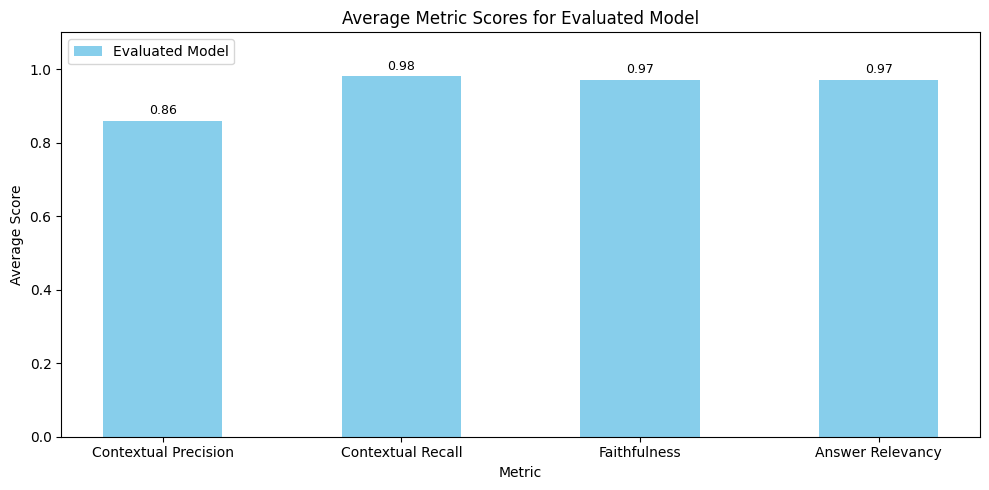

In [5]:
# Calculate average scores for the evaluated model
eval_means = []

for i in range(4):
  metric = metric_name_mapping[i] + "_score"
  eval_mean = round(eval_df[metric].mean(), 2)
  eval_means.append(eval_mean)

# Plotting
x_labels = [title_mapping[i] for i in range(4)]
x = np.arange(len(x_labels))  # label locations
width = 0.5  # full-width bars since we only show one model

plt.figure(figsize=(10, 5))
bars = plt.bar(x, eval_means, width, label='Evaluated Model', color='skyblue')

# Labels and titles
plt.xlabel("Metric")
plt.ylabel("Average Score")
plt.title("Average Metric Scores for Evaluated Model")
plt.xticks(x, x_labels)
plt.ylim(0, 1.1)
plt.legend()

# Annotate bars
for bar in bars:
  height = bar.get_height()
  plt.text(
    bar.get_x() + bar.get_width() / 2,
    height + 0.01,
    f"{height:.2f}",
    ha='center', va='bottom', fontsize=9
  )

plt.tight_layout()
plt.show()